In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats

import utils
import seaborn as sns 
import plotnine as pn
from sklearn.preprocessing import StandardScaler, scale


In [2]:
import importlib
importlib.reload(utils)


<module 'utils' from '/home/acercyc/projects/Keio Testing_analysis/src/utils.py'>

# Measuring dimensionality for each trial and each health subject

In [3]:
subjs = utils.ExpInfo.getSubjIDs()
task = utils.ExpInfo.taskName[0]

# compute dimensionality 
def add_dim(subj, task):
    df = utils.LoadData.behaviorData(subj, task)
    x, h, y = utils.LoadData.xhy(subj, task)
    dims = []
    for h_ in h:
        h_ = scale(h_, axis=0)
        dims.append(utils.Analysis.dim_measure(h_))
    df_ = df
    df_['dim'] = dims
    return df_
    
df_all = utils.GroupOperation.map(add_dim, subjs, task)
df_all = pd.concat(df_all, axis=0)


Group loop |████████████████████████████████████████| 50/50 [100%] in 9.0s (5.58/s)                                     


In [5]:
df_all.to_csv('dim_data.csv')

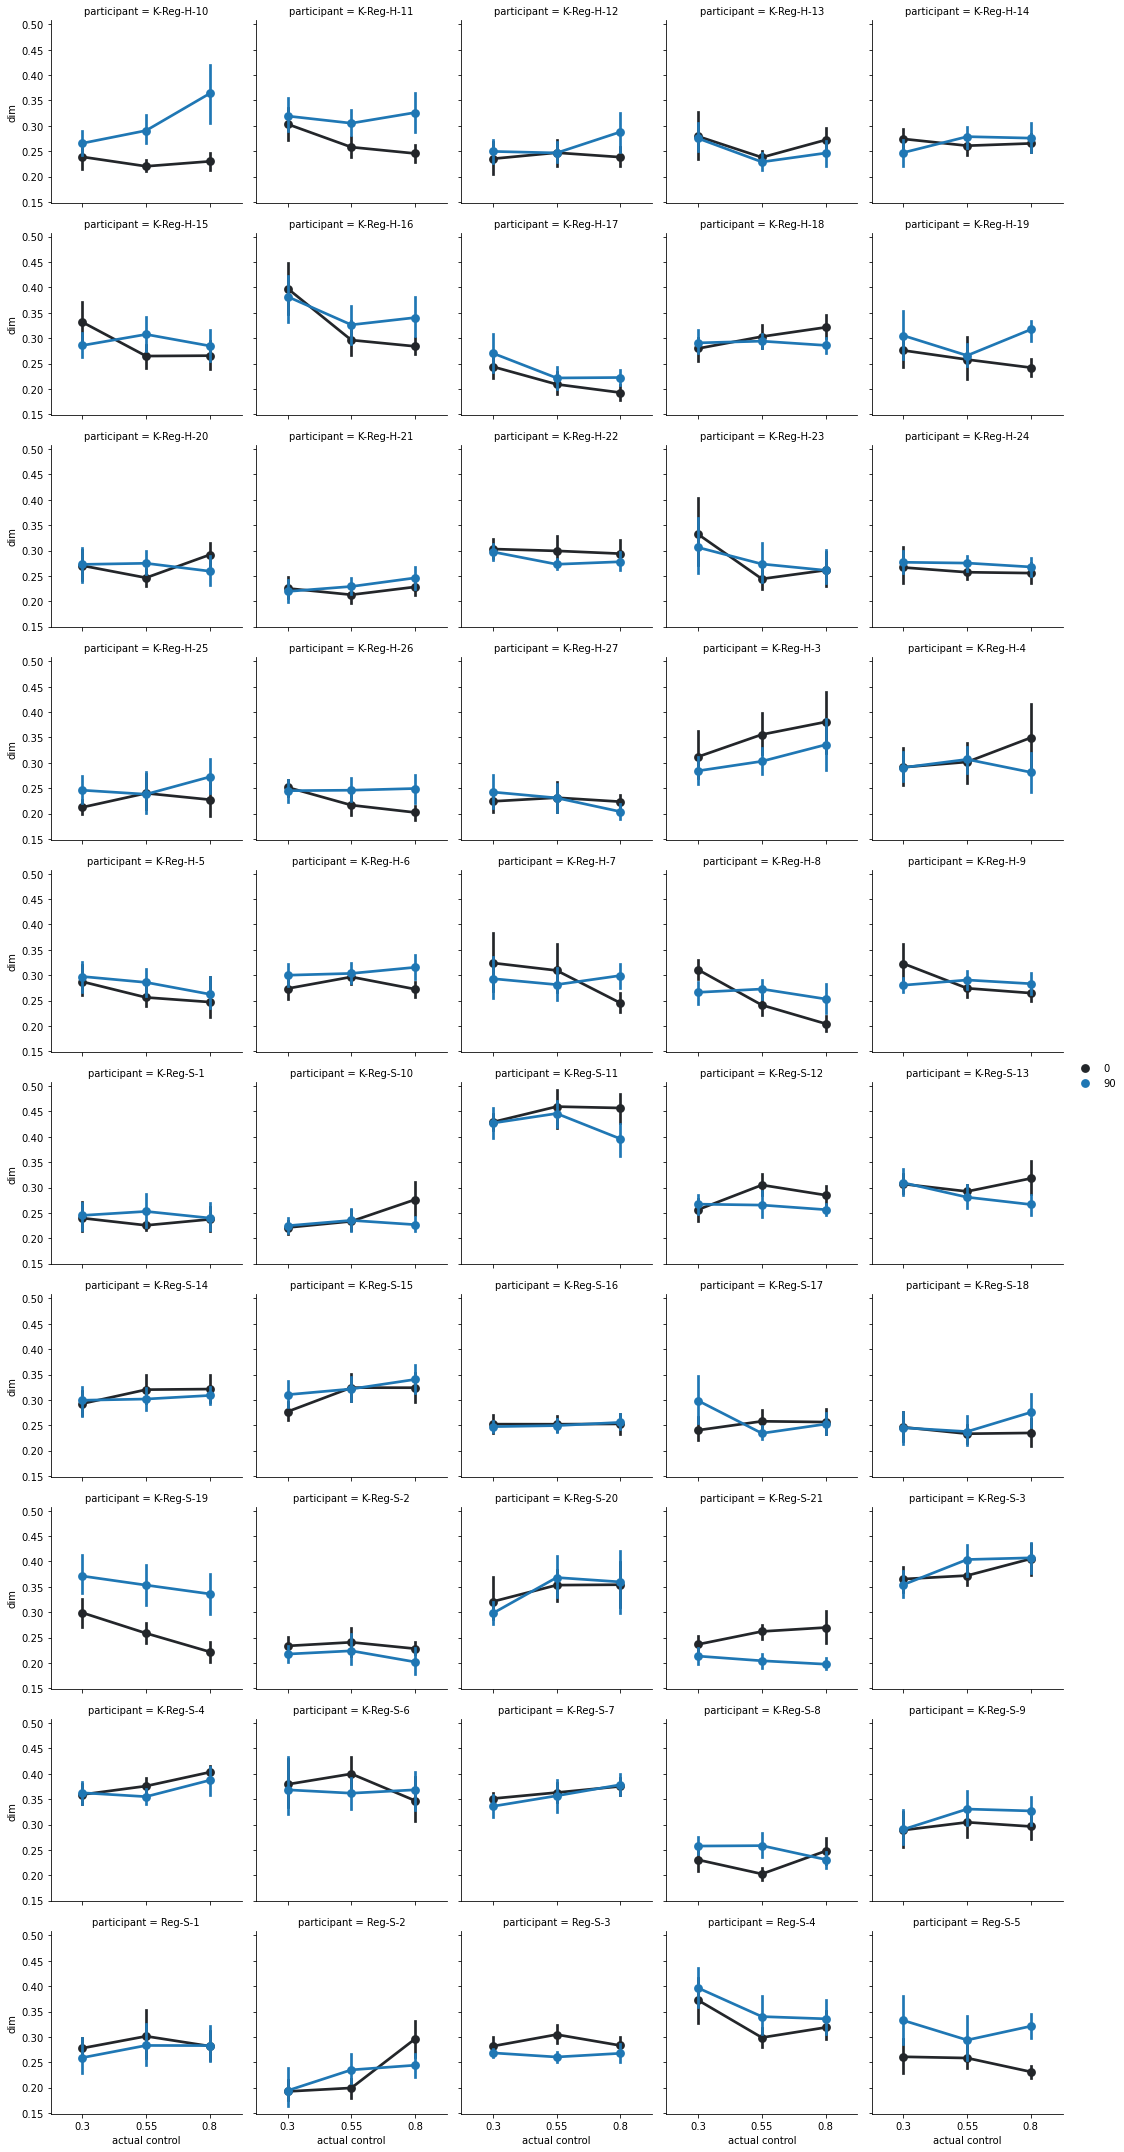

In [3]:
# plot dimensionality by conditions and subjects
grid = sns.FacetGrid(col='participant', col_wrap=5, data=df_all_)
grid.map_dataframe(sns.pointplot, 
                   x='actual control', 
                   y='dim', 
                   hue='angular bias')
grid.add_legend()


In [7]:
df_all_.head()

,participant,trial no.,actual control,angular bias,response,dim
0,K-Reg-H-10,1,0.30,0,0,0.264689
1,K-Reg-H-10,2,0.80,0,1,0.195716
2,K-Reg-H-10,3,0.30,0,0,0.239894
3,K-Reg-H-10,4,0.55,90,0,0.237551
4,K-Reg-H-10,5,0.30,90,0,0.249905


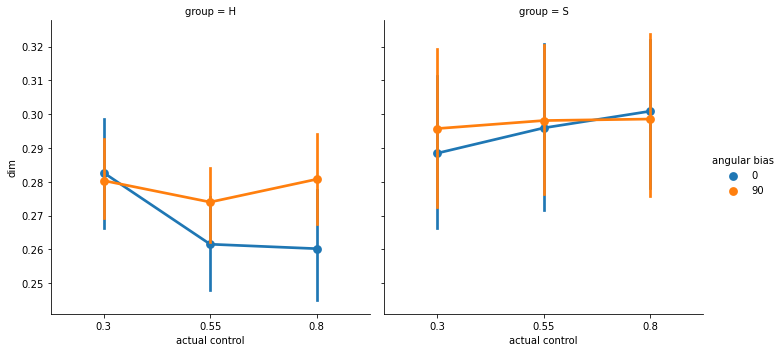

In [105]:
df_all_group = df_all_.copy()
df_all_group = df_all_group.drop(['trial no.', 'response'], axis=1)
df_all_group = df_all_group.groupby(['group', 'participant', 'actual control', 'angular bias'])
df_all_group = df_all_group.mean().reset_index()
# df_all_group = df_all_group.groupby()
# df_all_group.
sns.catplot(x='actual control', y='dim', hue='angular bias', data=df_all_group, col='group', kind='point')
# sns.catplot(x='actual control', y='nSeg', hue='angular bias', data=df_nap_, kind='point', col='group')

In [78]:
df_all_group = df_all_.copy()
df_all_group = df_all_group.drop(['trial no.', 'response'], axis=1)
df_all_group = df_all_group.groupby(['group', 'participant', 'actual control', 'angular bias'])
df_all_group = df_all_group.agg(['mean', 'std']).reset_index()
df_all_group.columns = df_all_group.columns.to_flat_index()
df_all_group.columns = [''.join(c) for c in df_all_group.columns]
df_all_group
# df_all_group = df_all_group.groupby()
# df_all_group.
# sns.catplot(x='actual control', y='dim', hue='angular bias', data=df_all_group, col='group', kind='point')
# sns.catplot(x='actual control', y='nSeg', hue='angular bias', data=df_nap_, kind='point', col='group')

,group,participant,actual control,angular bias,dimmean,dimstd
0,H,K-Reg-H-10,0.30,0,0.238775,0.038806
1,H,K-Reg-H-10,0.30,90,0.265718,0.039986
2,H,K-Reg-H-10,0.55,0,0.220302,0.017047
3,H,K-Reg-H-10,0.55,90,0.290689,0.048756
4,H,K-Reg-H-10,0.80,0,0.229982,0.029701
...,...,...,...,...,...,...
295,S,Reg-S-5,0.30,90,0.332415,0.084333
296,S,Reg-S-5,0.55,0,0.258351,0.039677
297,S,Reg-S-5,0.55,90,0.293828,0.072613
298,S,Reg-S-5,0.80,0,0.231179,0.019622


In [ ]:
# df_all_group.groupby()

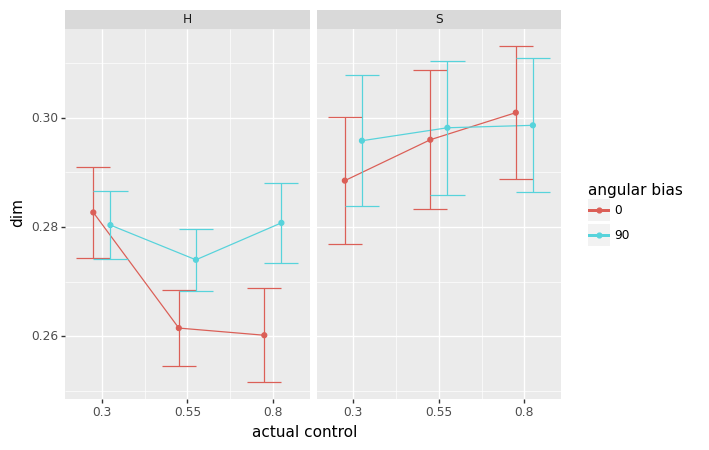

<ggplot: (8763998817241)>

In [131]:
import plotnine as pn
import plotnine_prism as pnp
from scipy.stats import sem
df_all_group_ = df_all_group.copy()
df_all_group_['angular bias'] = pd.Categorical(df_all_group_['angular bias'])
# df_all_group_['actual control'] = pd.Categorical(df_all_group_['actual control'])
(pn.ggplot(df_all_group_, pn.aes(x='actual control', y='dim', color='angular bias')) + 
 pn.stat_summary(geom='point', fun_y=np.mean, position=pn.position_dodge(width=0.1)) +
 pn.stat_summary(geom='line', fun_y=np.mean, position=pn.position_dodge(width=0.1)) +
 pn.stat_summary(geom='errorbar', fun_data = 'mean_se', width = 0.2, position=pn.position_dodge(width=0.1)) +
#  pn.geom_line() + 
#  pn.geom_point() + 
#  pn.theme_gray() +
 pn.scale_x_continuous(breaks=[0.3, 0.55, 0.8], labels=['0.3', '0.55', '0.8'])+
 pn.facet_wrap('group') 
)

In [6]:
df_all_group.head()

,group,participant,actual control,angular bias,dim
0,H,K-Reg-H-10,0.30,0,0.238775
1,H,K-Reg-H-10,0.30,90,0.265718
2,H,K-Reg-H-10,0.55,0,0.220302
3,H,K-Reg-H-10,0.55,90,0.290689
4,H,K-Reg-H-10,0.80,0,0.229982


# Statistical testing

In [28]:
df_all_group_ = df_all_group.copy()
df_anova = df_all_group_.pivot_table(index='participant', values='dim', columns=['group', 'actual control', 'angular bias'])
df_anova = df_anova.reset_index()
df_anova.to_csv('anova')

In [21]:
from pingouin import mixed_anova
anova = mixed_anova(df_all_group, dv='dim', within=['group', 'actual control', 'angular bias'],
                    between='group')

ValueError: within and between factors must both be strings referring to a column in the data. Specifying multiple within and between factors is currently not supported. For more information, see: https://github.com/raphaelvallat/pingouin/issues/136

In [18]:
from statsmodels.stats.anova import AnovaRM
df_all_group_ = df_all_group.rename(columns={'actual control': 'actual_control', 
                                             'angular bias': 'angular_bias'})
anova = AnovaRM(df_all_group_, 'dim', 'participant', 
                within=['actual_control', "angular_bias"], 
                between='group').fit()


NotImplementedError: Between subject effect not yet supported!

In [17]:
print(anova)

                          Anova
                            F Value Num DF  Den DF Pr > F
---------------------------------------------------------
actual_control               0.7116 2.0000 98.0000 0.4934
angular_bias                 2.7322 1.0000 49.0000 0.1047
actual_control:angular_bias  0.7950 2.0000 98.0000 0.4545



## logistic regression on dimensionality and response

In [ ]:
def reg_dim_resp(subj, task):
    df_dim = add_dim(subj, task)
    df_dim = sm.add_constant(df_dim)
    logit_res = sm.Logit(df_dim['response'], df_dim[['dim', 'const']]).fit()
    return logit_res

logit_res = utils.GroupOperation.map(reg_dim_resp, subjs, task)

In [133]:
# extract coefficients and compute group t-test
dim_beta = [x.params['dim'] for x in logit_res]
scipy.stats.ttest_1samp(dim_beta, 0)

Ttest_1sampResult(statistic=-2.376005879805179, pvalue=0.02582898625194411)